In [1]:
import re
import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pathfile = r'C:\Users\renoip\disser'
dataset_file = pathlib.Path(pathfile).joinpath('data')

### Прежде всего неоходимо прочесть все документы

In [2]:
lines = ''
patients = []
docs = [file for file in dataset_file.iterdir() if file.suffix == '.txt']
for file in docs:
    tables = []
    with open(file, 'rt') as f:
        for line in f:
            line = re.sub(r'[0-9]+', '', line)
            tables.append(line)
    patients.append(tables)

### Для уменьшения количества форм слов неоходимо произвести лемматизацию

In [3]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

for j in range(len(patients)):
    new_tables = []
    for i in range(len(patients[j])):
        words = patients[j][i].split()
        new_words = []
        for word in words:
            p = morph.parse(word)[0]
            new_words.append(p.normal_form)
        new_tables.append(new_words)
                
    patients[j] = new_tables

### Если при осмотре не обнаружено никаких изменений, то необходимо повторить в истории результат предыдущего осмотра и посчитать длительность лечения

In [4]:
days = []
for j in range(len(patients)):
    for k in range(len(patients[j])):
        if patients[j][k] in [['..', ':'], ['...'], ['..'], []]:
            patients[j][k] = patients[j][k-1]
    days.append(len(patients[j]))

### Для tf-idf необходимо все слова обратно соединить в предложения.

In [5]:
"""преобразование таблиц"""
lines = []
for j in range(len(patients)):
    line = ''
    for k in range(len(patients[j])):
        line += ' '.join(patients[j][k])
    lines.append(line)

### Используем библиотеку nltk для получения списка стоп-слов русского языка

In [6]:
#pip install nltk
# import nltk
# nltk.download('stopwords')

### Расширим список стоп-слов своими словами

In [7]:
"""tf-idf"""
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

additional_stop_words = ['дата','время','осмотра','номер','пациента', 
              'локальный','статус','при','по', "под", 'осмотр', 'жалобы', 'пол',
              'возраст','мужской','женский', 'loc', 'localis', 'st', 'нет', 'не']
russian_stopwords = stopwords.words("russian")
russian_stopwords += additional_stop_words
vectorizer = TfidfVectorizer(stop_words=russian_stopwords, ngram_range=(1,3))
matrix = vectorizer.fit_transform(lines).toarray()
df = pd.DataFrame(data=matrix)
df.columns = vectorizer.get_feature_names()
df.head()

,абсцесс,абсцесс учитывать,абсцесс учитывать практически,ад,ад боль,ад боль сустав,аденита,аденита ангоита,аденита ангоита боль,аксилярный,...,яркий горячий ощупь,яркий пигментация,яркий пигментация кожа,яркий чёткий,яркий чёткий границами,яркий эритема,яркий эритема горячий,ясные,ясные живот,ясные живот мягкий
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Добавим количество дней в больнице и произведем нормализацию

In [8]:
from sklearn.preprocessing import Normalizer
df['number of days'] = days
print(df['number of days'].describe())
df_normalized = Normalizer(norm='l2').fit_transform(df)

count    58.000000
mean     11.241379
std       2.664321
min       5.000000
25%      10.000000
50%      11.000000
75%      12.000000
max      23.000000
Name: number of days, dtype: float64


### PCA

In [9]:
"""PCA свой"""

# X = df_normalized
# cov_mat = np.cov(X.T)
# eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# tot = sum(eigen_vals)
# var_exp = [(i / tot) for i in
#           sorted(eigen_vals, reverse=True)]
# cum_var_exp = np.cumsum(var_exp)

# plt.figure(figsize=(32,9))
# plt.bar(range(1,X.shape[1]+1), var_exp, alpha=0.5, align='center', label='индивидуальная объясненная дисперсия')
# plt.step(range(1,X.shape[1]+1), cum_var_exp, where='mid', label='кумулятивая объясненная дисперсия')
# plt.ylabel('доля объясненной дисперсии')
# plt.xlabel('главные компоненты')
# plt.legend(loc='best')
# plt.show()

'PCA свой'

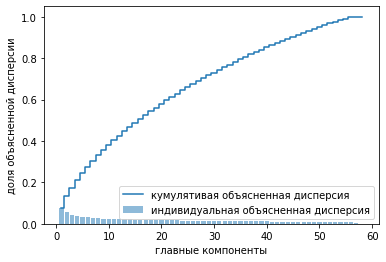

In [10]:
"""PCA in sklearn"""
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
X_pca = pca.fit_transform(df_normalized)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(1,df_normalized.shape[0]+1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='индивидуальная объясненная дисперсия')
plt.step(range(1,df_normalized.shape[0]+1), cum_var_exp, where='mid', label='кумулятивая объясненная дисперсия')
plt.ylabel('доля объясненной дисперсии')
plt.xlabel('главные компоненты')
plt.legend(loc='best')
plt.show()

Анализ главных компонент не дал никаких результатов, так как всю дисперсию описываю 60 компонент

### Сгруппируем дни в больнице и применим другие методы уменьшения размерности такие как UMAP, TNSE, ISOMAP, MDS и TNSE with PCA

In [11]:
days_groups = []
for i in days:
    if i <= 11:
        days_groups.append(0)
#     elif (i > 7) and (i <= 14):
#         days_groups.append(1)
    elif i > 11:
        days_groups.append(2)
colors = len(set(days_groups))

In [12]:
"""TNSE"""
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(df_normalized)

In [13]:
"""TNSE with PCA"""
from sklearn.decomposition import PCA
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df_normalized)

tsne = TSNE(n_components=2)
tsne_pca_results = tsne.fit_transform(pca_result_50)

In [14]:
"""UMAP"""
#pip(conda) install umap-learn

import umap
reducer = umap.UMAP()
umap_result = reducer.fit_transform(df_normalized)

In [15]:
"""MDS (Multidimensional Scaling)"""

from sklearn.manifold import MDS
embedding_MDS = MDS(n_components=2)
mds_result = embedding_MDS.fit_transform(df_normalized)

In [16]:
"""isomap"""

from sklearn.manifold import Isomap
embedding_isomap = Isomap(n_components=2)
isomap_result = embedding_isomap.fit_transform(df_normalized)

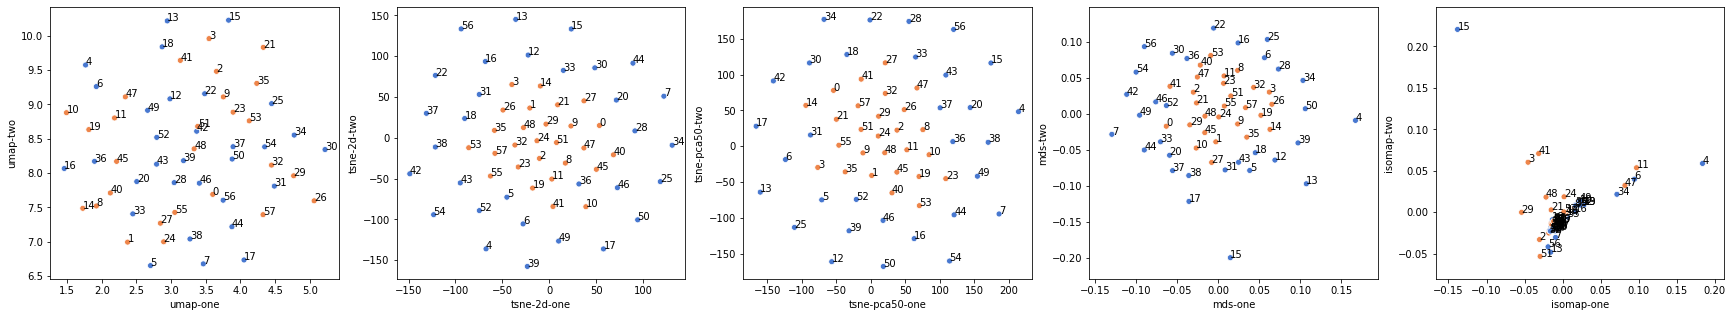

In [17]:
df_subset = pd.DataFrame()
df_subset['umap-one'] = umap_result[:,0]
df_subset['umap-two'] = umap_result[:,1]
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
df_subset['mds-one'] = mds_result[:,0]
df_subset['mds-two'] = mds_result[:,1]
df_subset['isomap-one'] = isomap_result[:,0]
df_subset['isomap-two'] = isomap_result[:,1]


plt.figure(figsize=(30,5))

ax1 = plt.subplot(1, 5, 1)
sns.scatterplot(
    x="umap-one", y="umap-two",
    hue=days_groups,
    palette=sns.color_palette("muted", colors),
    data=df_subset,
    legend=False,
    alpha=1,
    ax=ax1
)

for i in range(umap_result.shape[0]):
    plt.annotate(i, xy=(umap_result[i,0], umap_result[i,1]))

ax2 = plt.subplot(1, 5, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=days_groups,
    palette=sns.color_palette("muted", colors),
    data=df_subset,
    legend=False,
    alpha=1,
    ax=ax2
)

for i in range(tsne_results.shape[0]):
    plt.annotate(i, xy=(tsne_results[i,0], tsne_results[i,1]))

ax3 = plt.subplot(1, 5, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue=days_groups,
    palette=sns.color_palette("muted", colors),
    data=df_subset,
    legend=False,
    alpha=1,
    ax=ax3
)

for i in range(tsne_pca_results.shape[0]):
    plt.annotate(i, xy=(tsne_pca_results[i,0], tsne_pca_results[i,1]))
    
ax4 = plt.subplot(1, 5, 4)
sns.scatterplot(
    x="mds-one", y="mds-two",
    hue=days_groups,
    palette=sns.color_palette("muted", colors),
    data=df_subset,
    legend=False,
    alpha=1,
    ax=ax4
)

for i in range(mds_result.shape[0]):
    plt.annotate(i, xy=(mds_result[i,0], mds_result[i,1]))

ax5 = plt.subplot(1, 5, 5)
sns.scatterplot(
    x="isomap-one", y="isomap-two",
    hue=days_groups,
    palette=sns.color_palette("muted", colors),
    data=df_subset,
    legend=False,
    alpha=1,
    ax=ax5
)

for i in range(isomap_result.shape[0]):
    plt.annotate(i, xy=(isomap_result[i,0], isomap_result[i,1]))

isomap подбирает все параметры автоматически, кроме количества ближайших соседей, поэтому необходимо проверить этот алгоритм с разными значениями ближайших соседей

### Подбираем параметры isomap

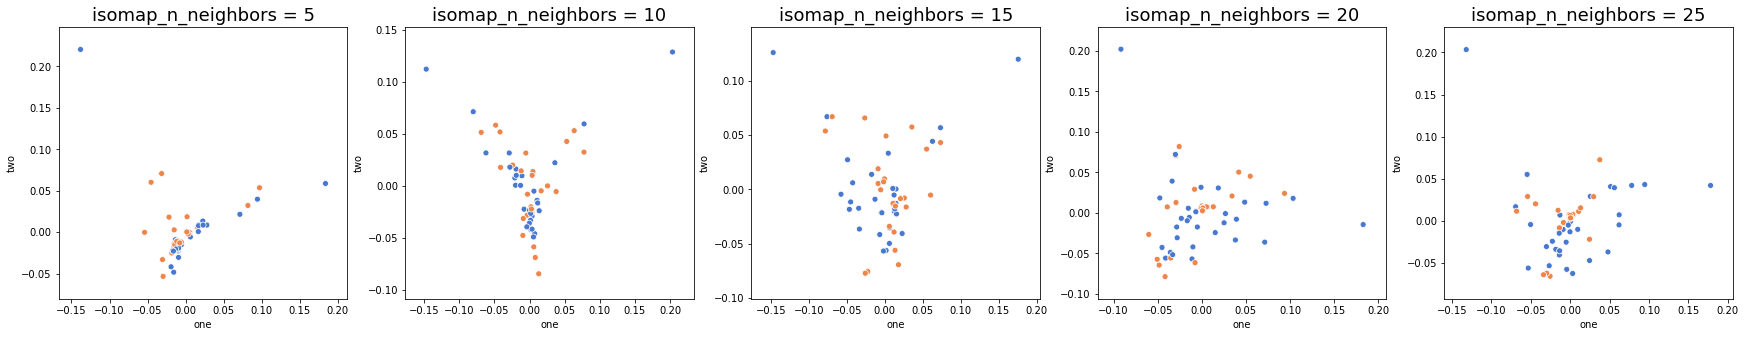

In [18]:
ax_list = []
plt.figure(figsize=(30,5))
for n in range(1,6):
    fit = Isomap(
        n_neighbors=n*5,
        n_components=2)
    u = fit.fit_transform(df_normalized);
    
    subset = pd.DataFrame()
    subset['one'] = u[:,0]
    subset['two'] = u[:,1]
    

    ax = plt.subplot(1, 5, n)
    ax_list.append(ax)
    sns.scatterplot(
    x="one", y="two",
    hue=days_groups,
    palette=sns.color_palette("muted", colors),
    data=subset,
    legend=False,
    alpha=1,
    ax=ax_list[n-1]
    )
    title='isomap_n_neighbors = {}'.format(n*5)
    
    plt.title(title, fontsize=18)

### Проверим UMAP c различными параметрами

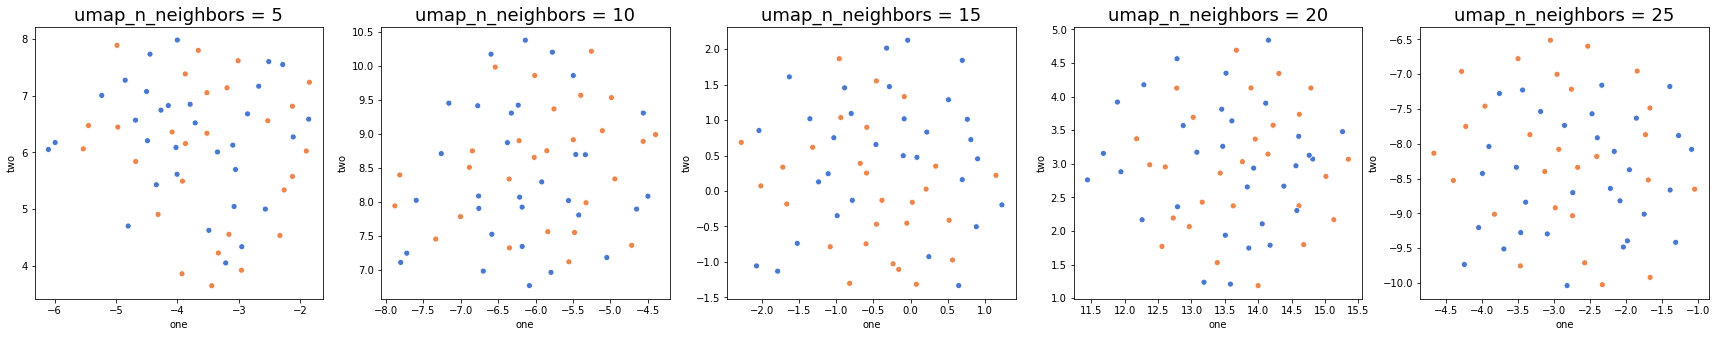

In [19]:
ax_list = []
plt.figure(figsize=(30,5))
for n in range(1,6):
    fit = umap.UMAP(
        n_neighbors=n*5,
        n_components=2)
    u = fit.fit_transform(df_normalized);
    
    subset = pd.DataFrame()
    subset['one'] = u[:,0]
    subset['two'] = u[:,1]
    

    ax = plt.subplot(1, 5, n)
    ax_list.append(ax)
    sns.scatterplot(
    x="one", y="two",
    hue=days_groups,
    palette=sns.color_palette("muted", colors),
    data=subset,
    legend=False,
    alpha=1,
    ax=ax_list[n-1]
    )
    title='umap_n_neighbors = {}'.format(n*5)
    
    plt.title(title, fontsize=18)

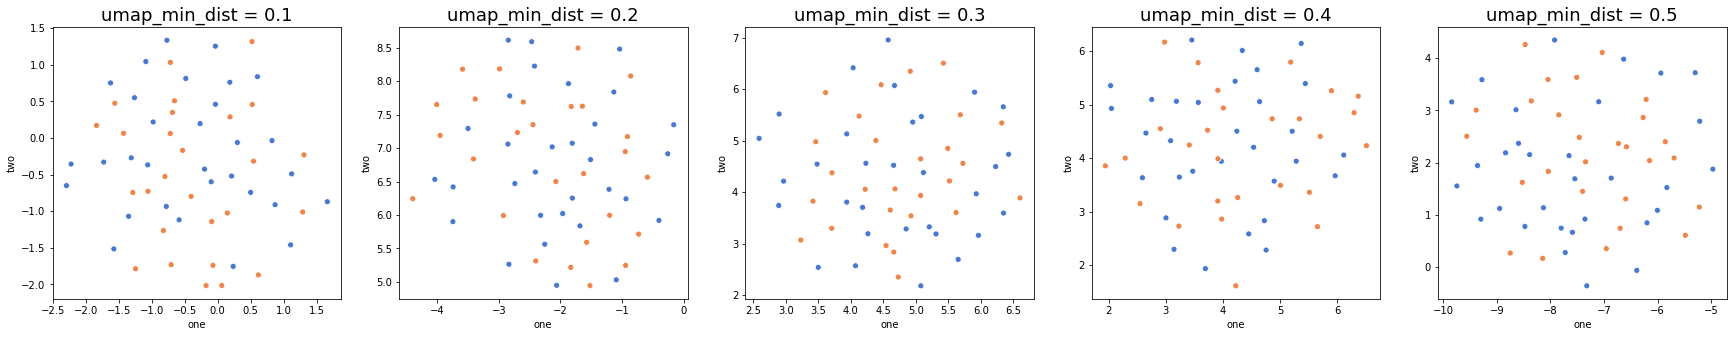

In [20]:
ax_list = []
plt.figure(figsize=(30,5))
for n in range(1,6):
    fit = umap.UMAP(
        min_dist=n/10,
        n_components=2)
    u = fit.fit_transform(df_normalized);
    
    subset = pd.DataFrame()
    subset['one'] = u[:,0]
    subset['two'] = u[:,1]
    

    ax = plt.subplot(1, 5, n)
    ax_list.append(ax)
    sns.scatterplot(
    x="one", y="two",
    hue=days_groups,
    palette=sns.color_palette("muted", colors),
    data=subset,
    legend=False,
    alpha=1,
    ax=ax_list[n-1]
    )
    title='umap_min_dist = {}'.format(n/10)
    
    plt.title(title, fontsize=18)

### Проверим TSNE с различными параметрами

In [21]:
def draw_tsne(perplexity=30, n_iter=1000, n_components=2, title=''):
    fit = TSNE(
        perplexity =perplexity ,
        n_iter=n_iter,
        n_components=n_components,
    )
    u = fit.fit_transform(df_normalized);
    subset = pd.DataFrame()
    subset['one'] = u[:,0]
    subset['two'] = u[:,1]
    plt.figure()

    ax1 = plt.subplot(1, 1, 1)
    sns.scatterplot(
    x="one", y="two",
    hue=days_groups,
    palette=sns.color_palette("muted", colors),
    data=subset,
    legend=False,
    alpha=1,
    ax=ax1
    )
        
    plt.title(title, fontsize=18)

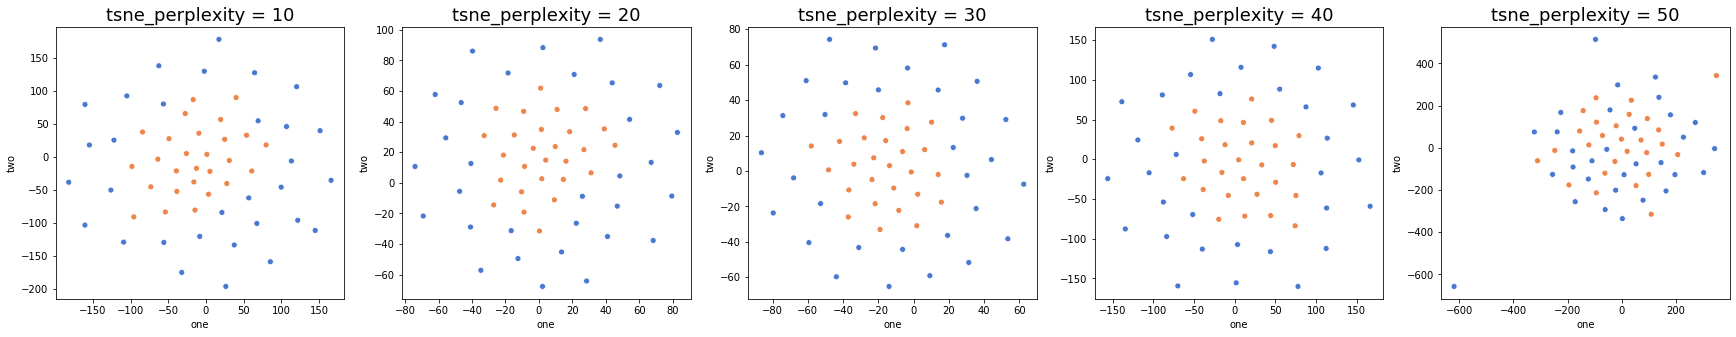

In [22]:
ax_list = []
plt.figure(figsize=(30,5))
for n in range(1,6):
    fit = TSNE(
        perplexity=n*10,
        n_components=2)
    u = fit.fit_transform(df_normalized);
    
    subset = pd.DataFrame()
    subset['one'] = u[:,0]
    subset['two'] = u[:,1]
    

    ax = plt.subplot(1, 5, n)
    ax_list.append(ax)
    sns.scatterplot(
    x="one", y="two",
    hue=days_groups,
    palette=sns.color_palette("muted", colors),
    data=subset,
    legend=False,
    alpha=1,
    ax=ax_list[n-1]
    )
    title='tsne_perplexity = {}'.format(n*10)
    
    plt.title(title, fontsize=18)

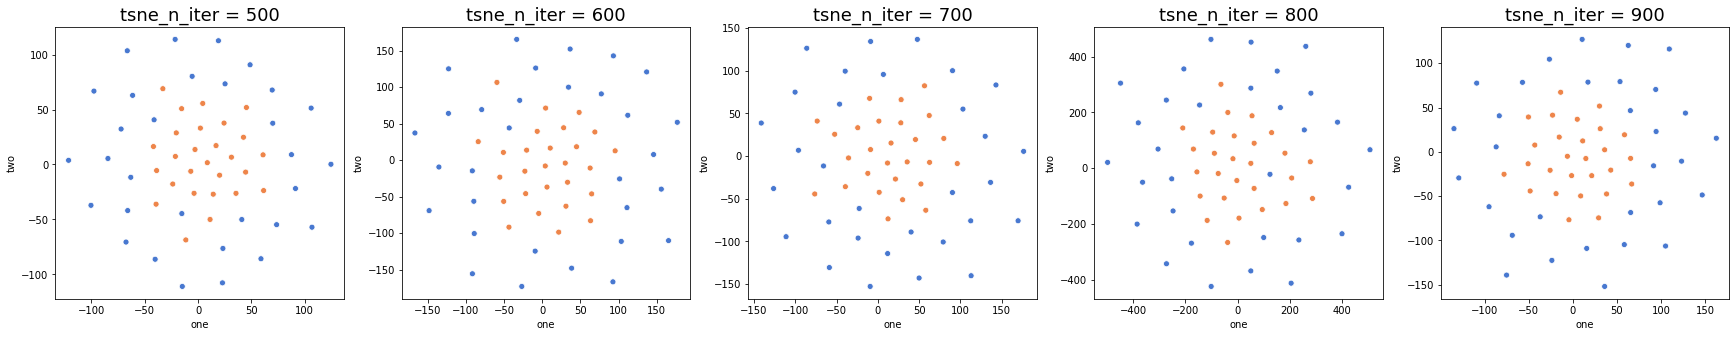

In [23]:
ax_list = []
plt.figure(figsize=(30,5))
for n in range(5,10):
    fit = TSNE(
        n_iter=n*100,
        n_components=2)
    u = fit.fit_transform(df_normalized);
    
    subset = pd.DataFrame()
    subset['one'] = u[:,0]
    subset['two'] = u[:,1]
    

    ax = plt.subplot(1, 5, n-4)
    ax_list.append(ax)
    sns.scatterplot(
    x="one", y="two",
    hue=days_groups,
    palette=sns.color_palette("muted", colors),
    data=subset,
    legend=False,
    alpha=1,
    ax=ax_list[n-5]
    )
    title='tsne_n_iter = {}'.format(n*100)
    
    plt.title(title, fontsize=18)

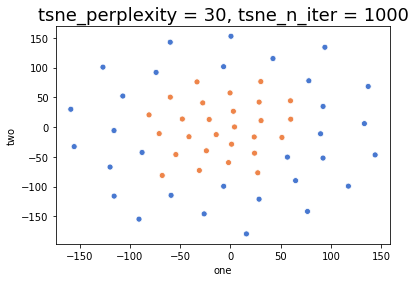

In [29]:
draw_tsne( title='tsne_perplexity = {}, tsne_n_iter = {}'.format(30, 1000))

### Проверим MDS с различными параметрами

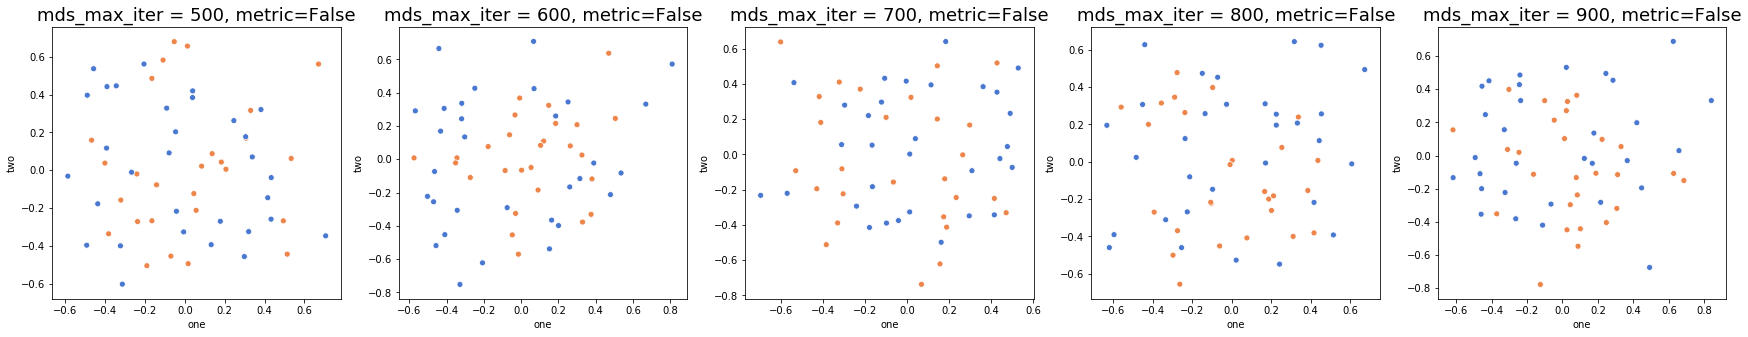

In [25]:
ax_list = []
plt.figure(figsize=(30,5))
for n in range(5,10):
    fit = MDS(
        metric=False,
        max_iter=n*100,
        n_components=2)
    u = fit.fit_transform(df_normalized);
    
    subset = pd.DataFrame()
    subset['one'] = u[:,0]
    subset['two'] = u[:,1]

    ax = plt.subplot(1, 5, n-4)
    ax_list.append(ax)
    sns.scatterplot(
    x="one", y="two",
    hue=days_groups,
    palette=sns.color_palette("muted", colors),
    data=subset,
    legend=False,
    alpha=1,
    ax=ax_list[n-5]
    )
    title='mds_max_iter = {}, metric={}'.format(n*100,False)
    
    plt.title(title, fontsize=18)

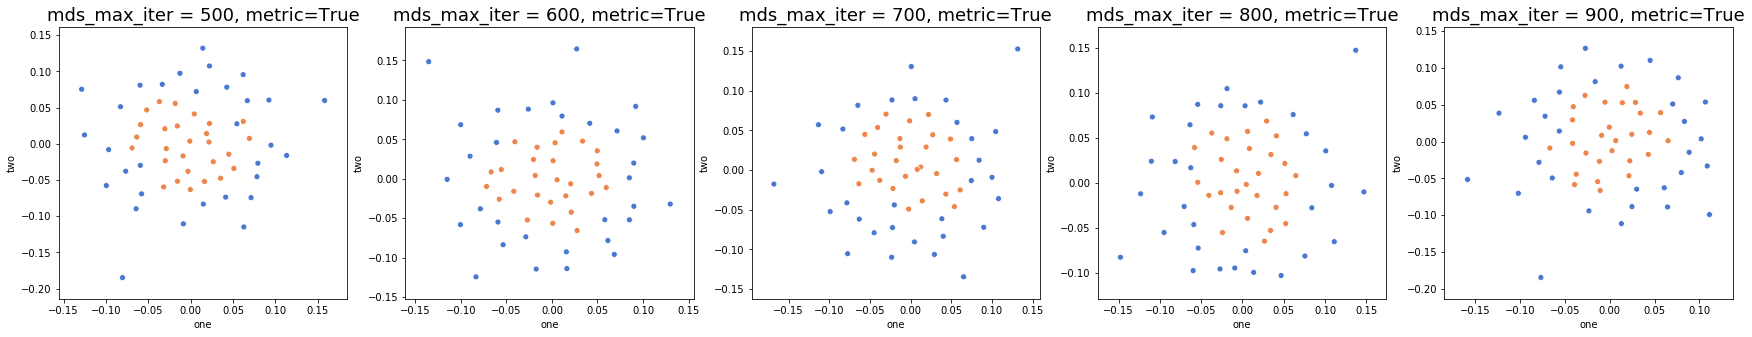

In [26]:
ax_list = []
plt.figure(figsize=(30,5))
for n in range(5,10):
    fit = MDS(
        metric=True,
        max_iter=n*100,
        n_components=2)
    u = fit.fit_transform(df_normalized);
    
    subset = pd.DataFrame()
    subset['one'] = u[:,0]
    subset['two'] = u[:,1]

    ax = plt.subplot(1, 5, n-4)
    ax_list.append(ax)
    sns.scatterplot(
    x="one", y="two",
    hue=days_groups,
    palette=sns.color_palette("muted", colors),
    data=subset,
    legend=False,
    alpha=1,
    ax=ax_list[n-5]
    )
    title='mds_max_iter = {}, metric={}'.format(n*100,True)
    
    plt.title(title, fontsize=18)